
#### Attribute Information:

This research employed a binary variable, default payment (Yes = 1, No = 0), as the response variable. This study reviewed the literature and used the following 23 variables as explanatory variables:
- ID: ID of each client
- LIMIT_BAL: Amount of given credit in NT dollars (includes individual and family/supplementary credit
- SEX: Gender (1=male, 2=female)
- EDUCATION: (1=graduate school, 2=university, 3=high school, 4=others, 5=unknown, 6=unknown)
- MARRIAGE: Marital status (1=married, 2=single, 3=others)
- AGE: Age in years
- PAY_0: Repayment status in September, 2005 (-1=pay duly, 1=payment delay for one month, 2=payment delay for two months, … 8=payment delay for eight months, 9=payment delay for nine months and above)
- PAY_2: Repayment status in August, 2005 (scale same as above)
- PAY_3: Repayment status in July, 2005 (scale same as above)
- PAY_4: Repayment status in June, 2005 (scale same as above)
- PAY_5: Repayment status in May, 2005 (scale same as above)
- PAY_6: Repayment status in April, 2005 (scale same as above)
- BILL_AMT1: Amount of bill statement in September, 2005 (NT dollar)
- BILL_AMT2: Amount of bill statement in August, 2005 (NT dollar)
- BILL_AMT3: Amount of bill statement in July, 2005 (NT dollar)
- BILL_AMT4: Amount of bill statement in June, 2005 (NT dollar)
- BILL_AMT5: Amount of bill statement in May, 2005 (NT dollar)
- BILL_AMT6: Amount of bill statement in April, 2005 (NT dollar)
- PAY_AMT1: Amount of previous payment in September, 2005 (NT dollar)
- PAY_AMT2: Amount of previous payment in August, 2005 (NT dollar)
- PAY_AMT3: Amount of previous payment in July, 2005 (NT dollar)
- PAY_AMT4: Amount of previous payment in June, 2005 (NT dollar)
- PAY_AMT5: Amount of previous payment in May, 2005 (NT dollar)
- PAY_AMT6: Amount of previous payment in April, 2005 (NT dollar)
- default payment next month : Default payment (1=yes, 0=no)

In [33]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics # for the check the error and accuracy of the model
from sklearn.metrics import classification_report,confusion_matrix, roc_curve, auc, accuracy_score, f1_score, precision_score, recall_score, roc_auc_score
import warnings
warnings.filterwarnings('ignore')

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble  import AdaBoostClassifier

In [2]:
# Reading the excel file and renaming the columns. Using first row as heading.
df=pd.read_excel("default of credit card clients.xls",header=1)
df

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,140000,2,1,2,31,1,-2,-2,-2,...,0,0,0,241,0,0,0,0,1419,0
9996,9997,80000,2,2,2,37,-2,-2,-2,-2,...,0,0,0,0,0,0,0,0,0,0
9997,9998,200000,1,3,1,44,0,0,0,0,...,151078,176717,168431,6437,5000,10000,27080,10017,4200,0
9998,9999,80000,2,2,2,26,-1,2,2,-2,...,0,0,0,0,0,0,0,0,0,1


#### We can see that we have 25 Columns in the dataset and 10000 unique credit card clients. 

In [3]:
#to check the datatypes of all features
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 25 columns):
ID                            10000 non-null int64
LIMIT_BAL                     10000 non-null int64
SEX                           10000 non-null int64
EDUCATION                     10000 non-null int64
MARRIAGE                      10000 non-null int64
AGE                           10000 non-null int64
PAY_0                         10000 non-null int64
PAY_2                         10000 non-null int64
PAY_3                         10000 non-null int64
PAY_4                         10000 non-null int64
PAY_5                         10000 non-null int64
PAY_6                         10000 non-null int64
BILL_AMT1                     10000 non-null int64
BILL_AMT2                     10000 non-null int64
BILL_AMT3                     10000 non-null int64
BILL_AMT4                     10000 non-null int64
BILL_AMT5                     10000 non-null int64
BILL_AMT6                

#### It can also be observed that even the categorical data is given in numeric form. 

In [4]:
# to check the number of columns and rows in the dataset
df.shape

(10000, 25)

In [5]:
df.size

250000

In [6]:
#to check the null values
df.isnull().sum()

ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default payment next month    0
dtype: int64

##### We can see that there are no null values are present in our Dataset.

## Missing value creation

In [7]:
# Creating the missing values- 5000 datapoints from the whole dataset.
# The code randomly selects a datapoint and replaces it with Null value.
# As per the code, the same datapoints if randomly selected, is not counted and is passed on.

col_num=[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25]
column=['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0','PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2','BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1','PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6','default payment next month']
deleted_list=[]
num=0
while True:
    col=np.random.randint(low=1,high=26)
    #print(col)
    for i in range(len(col_num)):
        if col_num[i]==col:
            col_name=column[i]
    #print(col,col_name) 
    row=np.random.randint(low=0,high=10000)
    deleted=str(row)+'x'+str(col)
    if deleted in deleted_list:
        continue
    else:
        df[col_name][row]=np.nan
        deleted_list.append(deleted)
    #print(deleted_list)
    num=num+1
    if num==5000:
        break

In [8]:
# Checking the Null values after running the creating missing values.
df.isnull().sum()

ID                            187
LIMIT_BAL                     205
SEX                           195
EDUCATION                     187
MARRIAGE                      204
AGE                           217
PAY_0                         199
PAY_2                         201
PAY_3                         194
PAY_4                         196
PAY_5                         204
PAY_6                         203
BILL_AMT1                     190
BILL_AMT2                     169
BILL_AMT3                     203
BILL_AMT4                     193
BILL_AMT5                     195
BILL_AMT6                     211
PAY_AMT1                      190
PAY_AMT2                      205
PAY_AMT3                      196
PAY_AMT4                      220
PAY_AMT5                      213
PAY_AMT6                      214
default payment next month    209
dtype: int64

# Data Cleaning

In [9]:
# Dropping the rows with missing target variable
dropindexes = df['default payment next month'][df['default payment next month'].isnull()].index #rows with nan diameters to drop
dropped_df = df.loc[dropindexes] #saving dropped rows for the future
df = df.drop(dropindexes, axis=0)
df.shape

(9791, 25)

In [10]:
# as ID column is not relevant, we are droping it.
df=df.drop(['ID'],axis=1)
df.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,20000.0,2.0,2.0,1.0,24.0,2.0,2.0,-1.0,-1.0,-2.0,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1.0
1,120000.0,2.0,2.0,2.0,26.0,-1.0,2.0,0.0,0.0,0.0,...,3272.0,NaN,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1.0
2,90000.0,2.0,2.0,2.0,34.0,0.0,0.0,0.0,0.0,0.0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0.0
3,50000.0,2.0,2.0,1.0,37.0,0.0,0.0,0.0,0.0,0.0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0.0
4,50000.0,1.0,2.0,1.0,57.0,-1.0,0.0,-1.0,0.0,0.0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0.0



##### Now we have 24 columns after dropping ID column

# Imputing Missing Values

In [11]:
# Imputing mode in the categorical features.
df['SEX'].fillna(df['SEX'].value_counts().index[0], inplace = True)
df['EDUCATION'].fillna(df['EDUCATION'].value_counts().index[0], inplace = True)
df['MARRIAGE'].fillna(df['MARRIAGE'].value_counts().index[0], inplace = True)

In [12]:
# Imputing mean of the numerical features.
df['LIMIT_BAL'].fillna(round(df['LIMIT_BAL'].mean()), inplace = True)
df['AGE'].fillna(round(df['AGE'].mean()), inplace = True)


In [13]:
# Imputing payment columns with mode of that person's remaining month's data.

import statistics 
col=['PAY_0','PAY_2','PAY_3','PAY_4','PAY_5','PAY_6']

for i in range(len(col)):
    #print(col[i])
    c=df[col[i]]
    for j in c.index:
        new=[]
        if c[j]!=c[j]:
            if df[col[0]][j]!=df[col[0]][j]:
                pass
            else:
                new.append(df[col[0]][j])
            if df[col[1]][j]!=df[col[1]][j]:
                pass
            else:
                new.append(df[col[1]][j])
            if df[col[2]][j]!=df[col[2]][j]:
                pass
            else:
                new.append(df[col[2]][j])
            if df[col[3]][j]!=df[col[3]][j]:
                pass
            else:
                new.append(df[col[3]][j])
            if df[col[4]][j]!=df[col[4]][j]:
                pass
            else:
                new.append(df[col[4]][j])
            if df[col[5]][j]!=df[col[5]][j]:
                pass
            else:
                new.append(df[col[5]][j])
            
            x = max(set(new), key=new.count)
            df[col[i]][j]=x

In [14]:
#Imputing BILL_AMT with average of the remaining months BILL_AMTs of the particular person.

import statistics 
col=['BILL_AMT1','BILL_AMT2','BILL_AMT3','BILL_AMT4','BILL_AMT5','BILL_AMT6']

for i in range(len(col)):
    #print(col[i])
    c=df[col[i]]
    
    for j in c.index:
        new=[]
        if c[j]!=c[j]:
            if df[col[0]][j]!=df[col[0]][j]:
                pass
            else:
                new.append(df[col[0]][j])
            if df[col[1]][j]!=df[col[1]][j]:
                pass
            else:
                new.append(df[col[1]][j])
            if df[col[2]][j]!=df[col[2]][j]:
                pass
            else:
                new.append(df[col[2]][j])
            if df[col[3]][j]!=df[col[3]][j]:
                pass
            else:
                new.append(df[col[3]][j])
            if df[col[4]][j]!=df[col[4]][j]:
                pass
            else:
                new.append(df[col[4]][j])
            if df[col[5]][j]!=df[col[5]][j]:
                pass
            else:
                new.append(df[col[5]][j])
                
            x = round(statistics.mean(new))
            df[col[i]][j]=x

In [15]:
#Imputing PAY_AMT with average of the remaining months PAY_AMTs of the particular person.

import statistics 
col=['PAY_AMT1','PAY_AMT2','PAY_AMT3','PAY_AMT4','PAY_AMT5','PAY_AMT6']

for i in range(len(col)):
    #print(col[i])
    c=df[col[i]]
    
    for j in c.index:
        new=[]
        if c[j]!=c[j]:
            if df[col[0]][j]!=df[col[0]][j]:
                pass
            else:
                new.append(df[col[0]][j])
            if df[col[1]][j]!=df[col[1]][j]:
                pass
            else:
                new.append(df[col[1]][j])
            if df[col[2]][j]!=df[col[2]][j]:
                pass
            else:
                new.append(df[col[2]][j])
            if df[col[3]][j]!=df[col[3]][j]:
                pass
            else:
                new.append(df[col[3]][j])
            if df[col[4]][j]!=df[col[4]][j]:
                pass
            else:
                new.append(df[col[4]][j])
            if df[col[5]][j]!=df[col[5]][j]:
                pass
            else:
                new.append(df[col[5]][j])
                
            x = round(statistics.mean(new))
            df[col[i]][j]=x

In [16]:
# checking for Null values in the dataset.
df.isnull().sum()

LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default payment next month    0
dtype: int64

#### All the Null values have been imputed.

# Data Cleaning

In [17]:
# As we can see 'PAY_1' is missing, hence assuming 'PAY_0' is actually 'PAY_1' , i.e.  history of payment for 1st month of past 6 months . 
# Also renaming 'default payment next month' as 'def_payment' which is the target variable.

df = df.rename(columns={'default payment next month':'def_payment','PAY_0': 'PAY_1'})
df.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,def_payment
0,20000.0,2.0,2.0,1.0,24.0,2.0,2.0,-1.0,-1.0,-2.0,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1.0
1,120000.0,2.0,2.0,2.0,26.0,-1.0,2.0,0.0,0.0,0.0,...,3272.0,2724.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1.0
2,90000.0,2.0,2.0,2.0,34.0,0.0,0.0,0.0,0.0,0.0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0.0
3,50000.0,2.0,2.0,1.0,37.0,0.0,0.0,0.0,0.0,0.0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0.0
4,50000.0,1.0,2.0,1.0,57.0,-1.0,0.0,-1.0,0.0,0.0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0.0


In [18]:
# To know the categries present in the categorical features.
list_of_cols = ['SEX','EDUCATION','MARRIAGE','PAY_1','PAY_2','PAY_3','PAY_4','PAY_5','PAY_6']
for col in list_of_cols:
    print(str(col) + ": "+ str(df[col].unique()))

SEX: [2. 1.]
EDUCATION: [2. 1. 3. 5. 4. 6. 0.]
MARRIAGE: [1. 2. 3. 0.]
PAY_1: [ 2. -1.  0. -2.  1.  3.  4.  8.  7.  5.  6.]
PAY_2: [ 2.  0. -1. -2.  3.  5.  7.  4.  1.  6.  8.]
PAY_3: [-1.  0.  2. -2.  3.  4.  6.  7.  1.  5.  8.]
PAY_4: [-1.  0. -2.  2.  3.  4.  5.  7.  6.  1.  8.]
PAY_5: [-2.  0. -1.  2.  3.  5.  4.  7.  8.  6.]
PAY_6: [-2.  2.  0. -1.  3.  6.  4.  7.  8.  1.  5.]


#### There are some unknown categories in the columns 'EDUCATION','MARRIAGE' and 'PAY_'. Next step will involve reassigning such unknown categories.

In [19]:
# EDUCATION column has following categores: 
#1 means  Graduate school,
#2 means  University, 
#3 means  High school, 
#4 means  Others, 
#0,5,6 is  Unknown, 

# Since 0,5,6 categories are the unknowns. Hence, replacing those with 'Others category' i.e. category 4.
fil = (df.EDUCATION == 5) | (df.EDUCATION == 6) | (df.EDUCATION == 0)
df.loc[fil, 'EDUCATION'] = 4
df.EDUCATION.value_counts()

2.0    4599
1.0    3567
3.0    1520
4.0     105
Name: EDUCATION, dtype: int64

In [20]:
# MARRIAGE column has following categories
#1 means married
#2 means single
#3 means others
#0 is unknown
# Since 0 category is unknown. Hence, replacing those with 'Others category' i.e. category 3.
df.loc[df.MARRIAGE == 0, 'MARRIAGE'] = 3
df.MARRIAGE.value_counts()

2.0    5446
1.0    4209
3.0     136
Name: MARRIAGE, dtype: int64

In [21]:
#In 'PAY_' columns, -1 is paid duly, whereas 0,-2 are unknown values. 
# Assuming these are duly paid, all the mentioned 3 categories are grouped under 0 which will be duly paid. 

pay0=(df.PAY_1==-1)|(df.PAY_1==-2)
pay2=(df.PAY_2==-1)|(df.PAY_2==-2)
pay3=(df.PAY_3==-1)|(df.PAY_3==-2)
pay4=(df.PAY_4==-1)|(df.PAY_4==-2)
pay5=(df.PAY_5==-1)|(df.PAY_5==-2)
pay6=(df.PAY_6==-1)|(df.PAY_6==-2)

df.loc[pay0,'PAY_1']=0
df.loc[pay2,'PAY_2']=0
df.loc[pay3,'PAY_3']=0
df.loc[pay4,'PAY_4']=0
df.loc[pay5,'PAY_5']=0
df.loc[pay6,'PAY_6']=0

In [22]:
df.to_csv('cc_cleaneddataself.csv')


In [34]:
df=pd.read_csv('cc_cleaneddataself.csv')
df.drop(['Unnamed: 0'],axis=1,inplace=True)
df.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,def_payment
0,20000.0,2.0,2.0,1.0,24.0,2.0,2.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1.0
1,120000.0,2.0,2.0,2.0,26.0,0.0,2.0,0.0,0.0,0.0,...,3272.0,2724.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1.0
2,90000.0,2.0,2.0,2.0,34.0,0.0,0.0,0.0,0.0,0.0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0.0
3,50000.0,2.0,2.0,1.0,37.0,0.0,0.0,0.0,0.0,0.0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0.0
4,50000.0,1.0,2.0,1.0,57.0,0.0,0.0,0.0,0.0,0.0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0.0


# Exploratory Data Analysis

In [24]:
df.describe()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,def_payment
count,9791.000000,9791.000000,9791.000000,9791.000000,9791.000000,9791.000000,9791.000000,9791.000000,9791.000000,9791.000000,...,9791.000000,9791.000000,9791.000000,9791.000000,9.791000e+03,9791.000000,9791.000000,9791.000000,9791.000000,9791.000000
mean,166333.925850,1.587478,1.812379,1.584006,35.388622,0.362374,0.318864,0.315596,0.237054,0.230007,...,40699.603411,39463.261465,38004.321111,5646.956899,5.825283e+03,4592.024002,4708.750077,4812.151976,5316.916760,0.226330
std,128945.530453,0.492313,0.726159,0.520338,9.215490,0.780659,0.816612,0.825340,0.744115,0.720063,...,61387.172976,59571.488757,59283.258547,15566.974209,2.413022e+04,16184.636386,14620.600152,14844.924764,17851.344631,0.418477
min,10000.000000,1.000000,1.000000,1.000000,21.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,-170000.000000,-20006.000000,-339603.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,50000.000000,1.000000,1.000000,1.000000,28.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,2064.500000,1626.500000,1020.000000,990.500000,6.760000e+02,300.000000,275.500000,264.000000,0.000000,0.000000
50%,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,18614.000000,17893.000000,16606.000000,2116.000000,2.000000e+03,1500.000000,1500.000000,1500.000000,1403.000000,0.000000
75%,230000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,50026.000000,49483.000000,48241.000000,5007.500000,5.000000e+03,4001.000000,4000.500000,4086.500000,4000.000000,0.000000
max,1000000.000000,2.000000,4.000000,3.000000,73.000000,8.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,405016.000000,1.684259e+06,896040.000000,497000.000000,379267.000000,403500.000000,1.000000


#### There are total 9791 credit card clients in this dataset after cleaning the data. 
#### The average credit card limit is 166334. The maximum limit is 10,00,000. Hence, the standard deviation is high at 128945.
#### The average age of the credit card clients is  around 35.

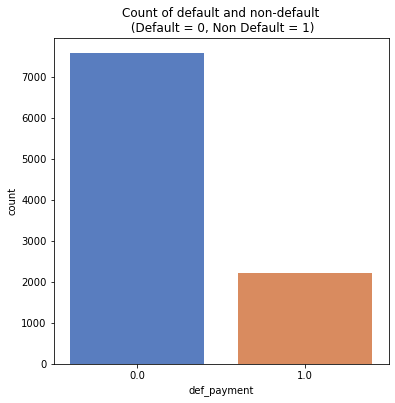

The percentage of default is 22.63 percent.


In [25]:
# Analysis of target variable
default= df.def_payment.sum()
non_default= len(df)-default

defperc= round(default/len(df)*100,2)
non_defperc= round(non_default/len(df)*100,2)
plt.figure(figsize = (6,6))
plt.title('Count of default and non-default\n (Default = 0, Non Default = 1)')
sns.set_color_codes("pastel")
b=sns.countplot(x = 'def_payment', data=df, palette='muted')
plt.annotate('Non-default: {}'.format(non_default), xy=(-0.3, 15000), xytext=(-0.3, 3000), size=10)
plt.annotate('Default: {}'.format(default), xy=(0.7, 15000), xytext=(0.7, 3000), size=10)
plt.annotate(str(non_defperc)+" %", xy=(-0.3, 15000), xytext=(-0.1, 8000), size=12)
plt.annotate(str(defperc)+" %", xy=(0.7, 15000), xytext=(0.9, 8000), size=12)
#locs, labels = plt.xticks()
plt.show()

print('The percentage of default is %.2f percent.'%(defperc))

#### In the above graph, 1 implies default whereas 0 implies non-default in the next month. The default rate is 22.63%. This implies that the dataset is unbalanced. 

50000.0     1140
20000.0      630
30000.0      527
80000.0      512
200000.0     470
Name: LIMIT_BAL, dtype: int64


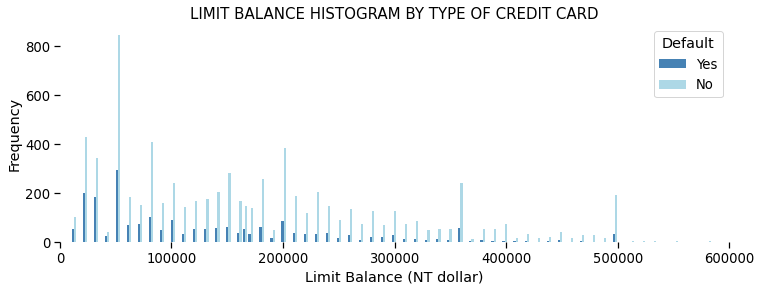

In [26]:
# Analysis of LIMIT_BAL.
print(df['LIMIT_BAL'].value_counts().head(5))

x1 = list(df[df['def_payment'] == 1]['LIMIT_BAL'])
x2 = list(df[df['def_payment'] == 0]['LIMIT_BAL'])

plt.figure(figsize=(12,4))
sns.set_context('notebook', font_scale=1.2)
#sns.set_color_codes("pastel")
plt.hist([x1, x2], bins = 200, color=['steelblue', 'lightblue'])
plt.xlim([0,600000])
plt.legend(['Yes', 'No'], title = 'Default', loc='upper right', facecolor='white')
plt.xlabel('Limit Balance (NT dollar)')
plt.ylabel('Frequency')
plt.title('LIMIT BALANCE HISTOGRAM BY TYPE OF CREDIT CARD', SIZE=15)
plt.box(False)
plt.savefig('ImageName', format='png', dpi=200, transparent=True);

#### We can see that the most common limit for credit card holders is 50000. 


Percentage of default
     def_payment
SEX             
2.0     0.216794
1.0     0.239911


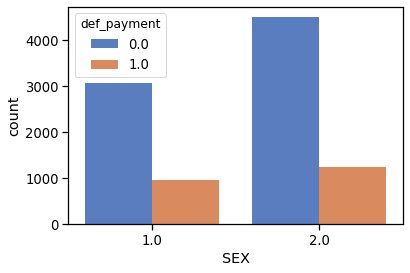

In [27]:
# Checking the number of counts of defaulters and non defaulters genderwise
g=sns.countplot(x="SEX", data=df,hue="def_payment", palette="muted")
print()
# Percentage of default genderwise
print('Percentage of default')
print(df[["SEX", "def_payment"]].groupby(['SEX']).mean().sort_values(by='def_payment'))

#### From the above graph, we can observe that the female clients are more in number than the male clients. In absolute terms, female defaulters are more, however if we observe the percentage of defaults, we can observe that male clients have a slightly higher default rate.

Percentage of default
           def_payment
EDUCATION             
4.0           0.057143
1.0           0.209700
2.0           0.236573
3.0           0.246053



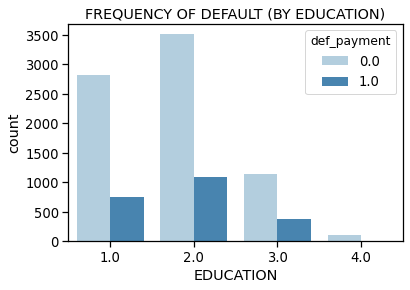

In [28]:
#Analysis of EDUCATION

plt.title('FREQUENCY OF DEFAULT (BY EDUCATION)')
sns.countplot(x="EDUCATION", hue="def_payment", data=df, palette="Blues")
# Percentage of default genderwise
print('Percentage of default')
print(df[["EDUCATION", "def_payment"]].groupby(['EDUCATION']).mean().sort_values(by='def_payment'))
print()


#### The education level of the credit card holders is mostly University level, followed by graduate level. The default rate is higher among credit card holders with high school education,followed by clients who have University level education.


Percentage of default
          def_payment
MARRIAGE             
3.0          0.205882
2.0          0.217040
1.0          0.239012



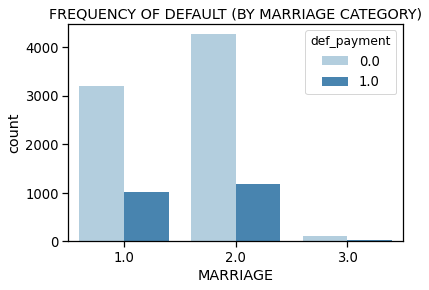

In [29]:
#Analysis of MARRIAGE feature
plt.title('FREQUENCY OF DEFAULT (BY MARRIAGE CATEGORY)')
sns.countplot(x="MARRIAGE", hue="def_payment", data=df, palette="Blues")
print()
# Percentage of default genderwise
print('Percentage of default')
print(df[["MARRIAGE", "def_payment"]].groupby(['MARRIAGE']).mean().sort_values(by='def_payment'))
print()

#### Majority of the credit card customers are single. The default rate is higher among customers who are in married, followed by customers who are single.

Text(0.5, 1.0, 'Defaulters based on age')

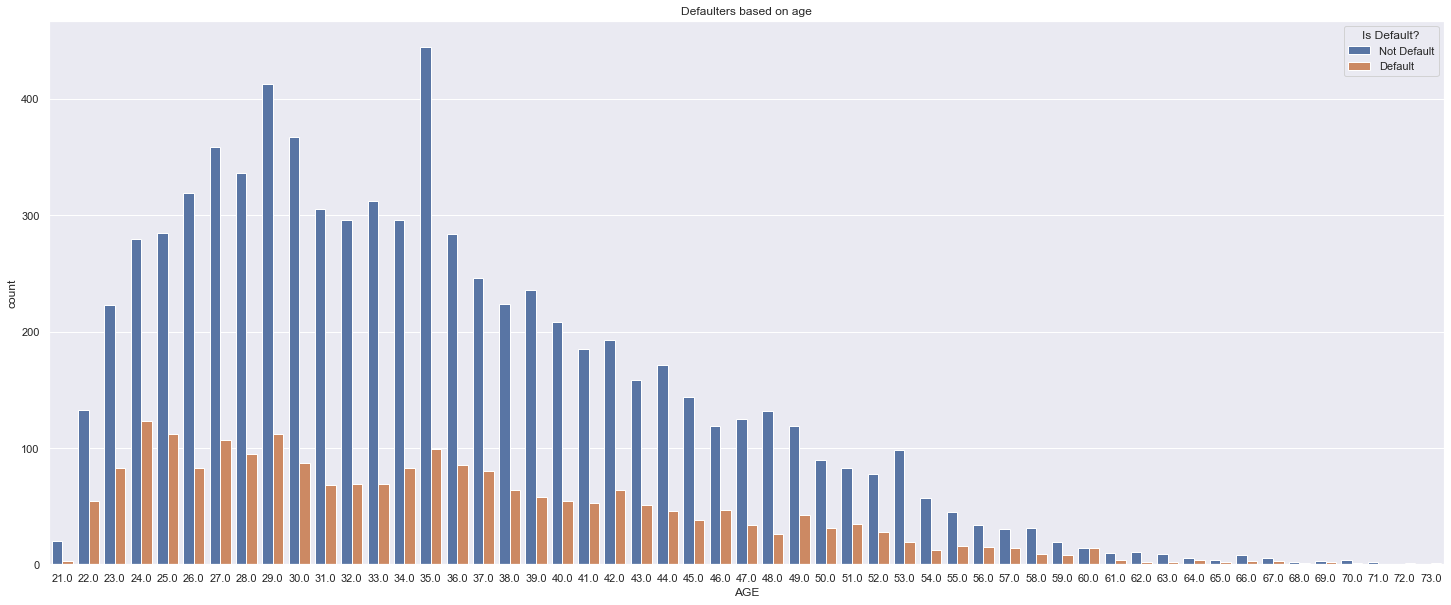

In [30]:
# Analysis of AGE column
sns.set(rc={'figure.figsize':(25,10)})
fig = sns.countplot(x = 'AGE', data = df, hue = 'def_payment')
fig.legend(title='Is Default?', loc='upper right', labels=["Not Default", "Default"])
fig.set_title("Defaulters based on age")

#### It can be observed from the above graph, that maximum number of credit card holders are of age 35. And maximum number of credit card holders are between age 22 to 45 years.

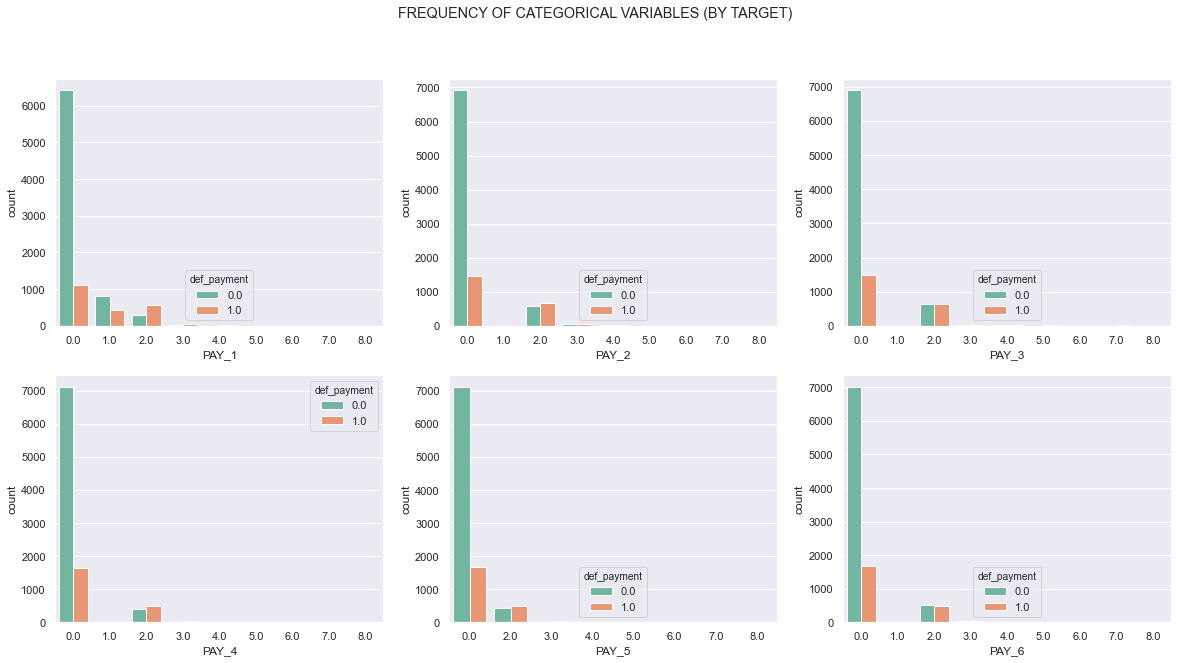

In [31]:
#Creating a new dataframe with payment history variables and checking it's distribution.

f, axes = plt.subplots(2, 3, figsize=(20, 10), facecolor='white')
f.suptitle('FREQUENCY OF CATEGORICAL VARIABLES (BY TARGET)')
ax4 = sns.countplot(x="PAY_1", hue="def_payment", data=df, palette="Set2", ax=axes[0,0])
ax5 = sns.countplot(x="PAY_2", hue="def_payment", data=df, palette="Set2", ax=axes[0,1])
ax6 = sns.countplot(x="PAY_3", hue="def_payment", data=df, palette="Set2", ax=axes[0,2])
ax7 = sns.countplot(x="PAY_4", hue="def_payment", data=df, palette="Set2", ax=axes[1,0])
ax8 = sns.countplot(x="PAY_5", hue="def_payment", data=df, palette="Set2", ax=axes[1,1])
ax9 = sns.countplot(x="PAY_6", hue="def_payment", data=df, palette="Set2", ax=axes[1,2]);

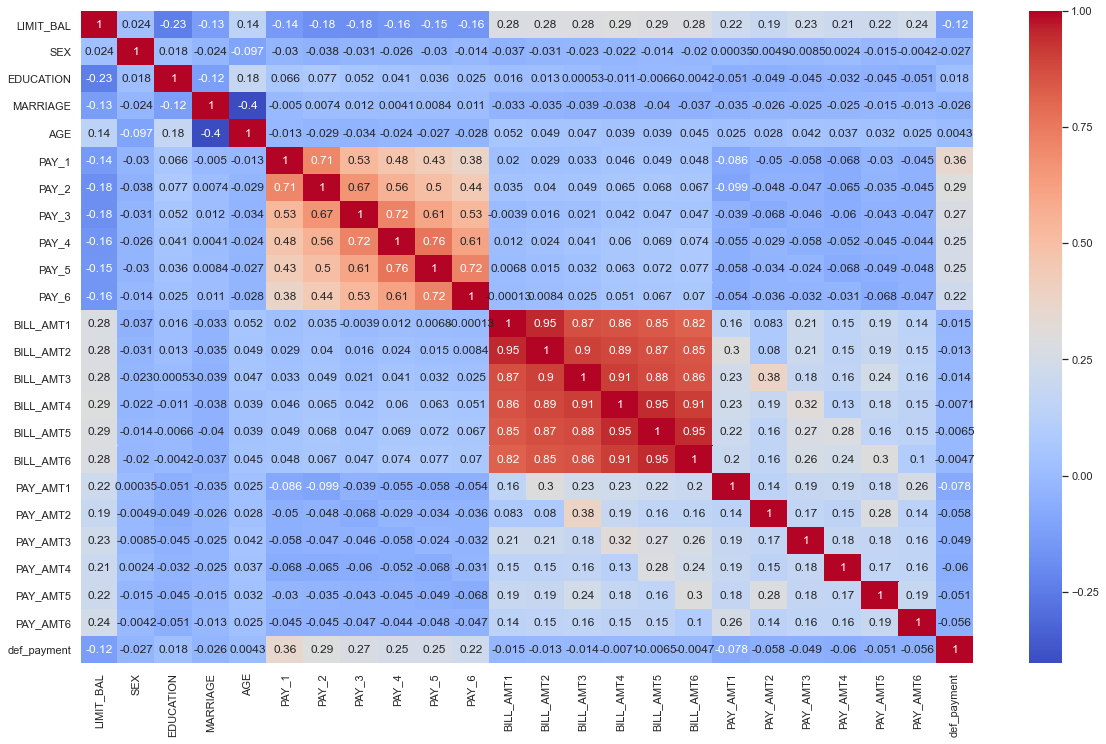

In [32]:
# Figure size
cor=df.corr()
plt.figure(figsize=(20,12))

# Heatmap
sns.heatmap(cor, cmap="coolwarm", annot=True)
plt.show()
   


##### Correlation of Y with independent variables: The Default Payment is positively correleated with PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY6 and Negatively Correlated with LIMIT_BAL and PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6.
     
##### Correlation among independent variables: You can see the middle matrix is highly correlated with each other(PAY_1,....PAY6 and BILL_AMT1,...BILL_AMT6)

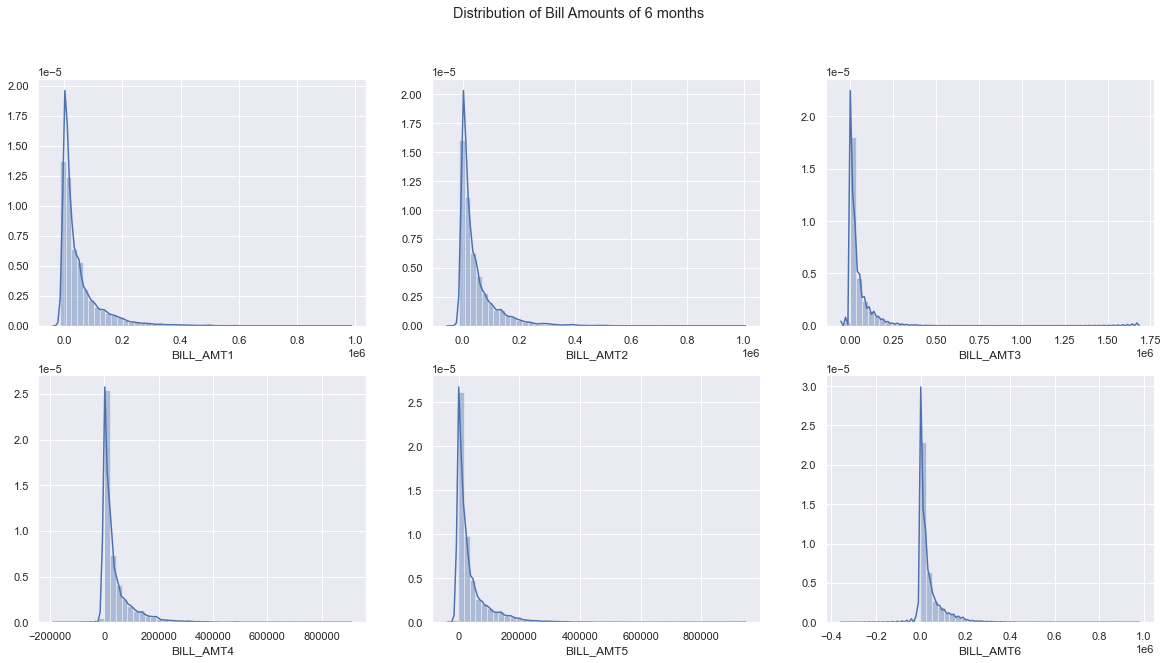

In [33]:
f, axes = plt.subplots(2, 3, figsize=(20, 10), facecolor='white')
f.suptitle('Distribution of Bill Amounts of 6 months')
ax4 = sns.distplot(df["BILL_AMT1"], ax=axes[0,0])
ax5 = sns.distplot(df["BILL_AMT2"], ax=axes[0,1])
ax6 = sns.distplot(df["BILL_AMT3"], ax=axes[0,2])
ax7 = sns.distplot(df["BILL_AMT4"], ax=axes[1,0])
ax8 = sns.distplot(df["BILL_AMT5"], ax=axes[1,1])
ax9 = sns.distplot(df["BILL_AMT6"], ax=axes[1,2]);


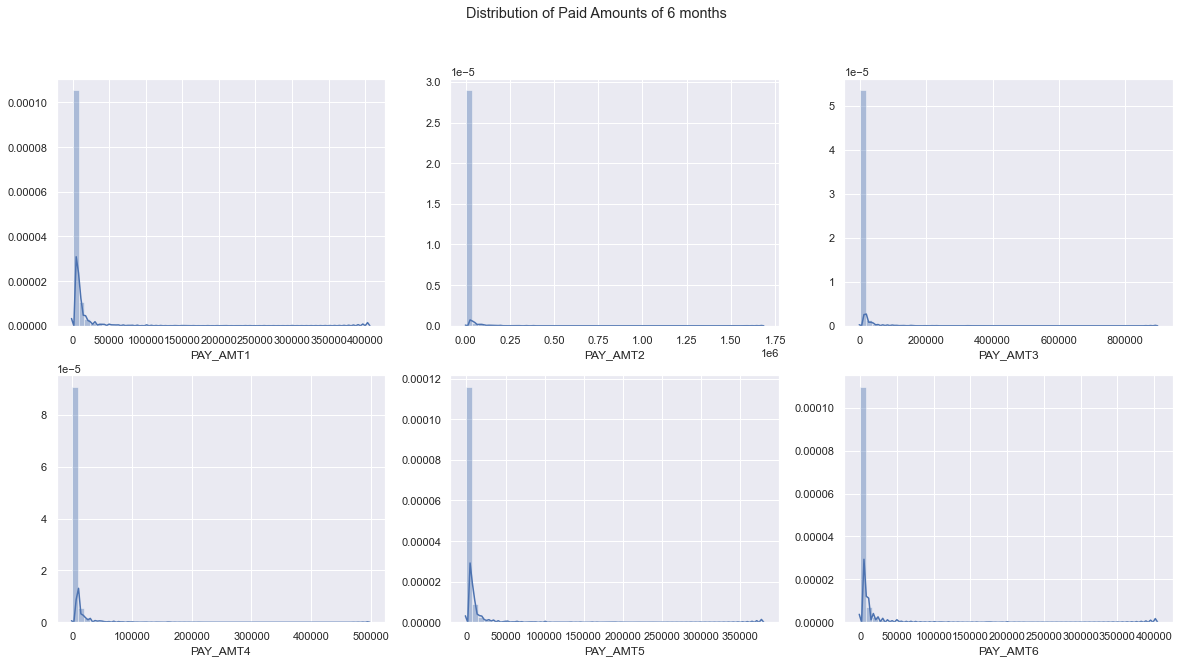

In [34]:
f, axes = plt.subplots(2, 3, figsize=(20, 10), facecolor='white')
f.suptitle('Distribution of Paid Amounts of 6 months')
ax4 = sns.distplot(df["PAY_AMT1"], ax=axes[0,0])
ax5 = sns.distplot(df["PAY_AMT2"], ax=axes[0,1])
ax6 = sns.distplot(df["PAY_AMT3"], ax=axes[0,2])
ax7 = sns.distplot(df["PAY_AMT4"], ax=axes[1,0])
ax8 = sns.distplot(df["PAY_AMT5"], ax=axes[1,1])
ax9 = sns.distplot(df["PAY_AMT6"], ax=axes[1,2]);

In [35]:
# As the features are positively skewed, hence applying yeo-johnson transformation.

columns=['AGE','LIMIT_BAL','BILL_AMT1','BILL_AMT2','BILL_AMT3','BILL_AMT4','BILL_AMT5','BILL_AMT6','PAY_AMT1','PAY_AMT2','PAY_AMT3','PAY_AMT4','PAY_AMT5','PAY_AMT6']


from scipy import stats

for col in columns:
    df[col], lmbda=stats.yeojohnson(df[col].astype(float))

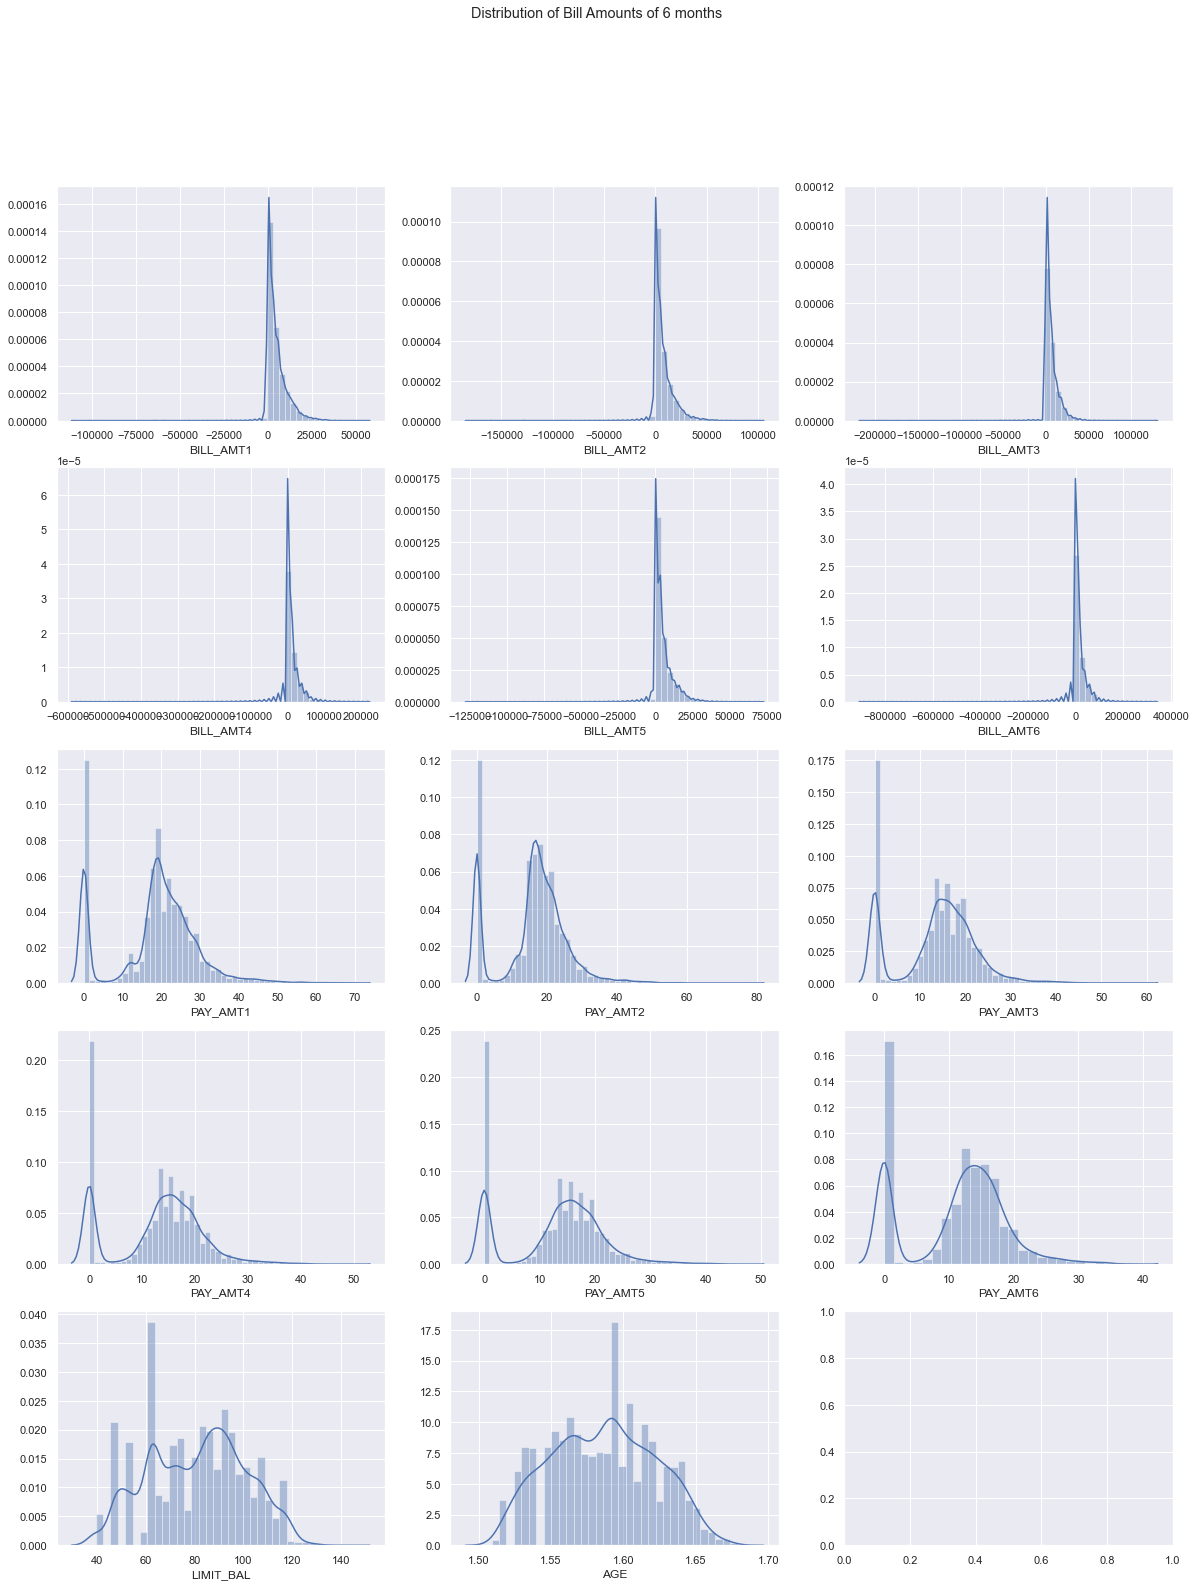

In [36]:
# PAY_AMT after yeo-johnson transformation.
f, axes = plt.subplots(5, 3, figsize=(20, 25), facecolor='white')
f.suptitle('Distribution of Bill Amounts of 6 months')
ax1 = sns.distplot(df["BILL_AMT1"], ax=axes[0,0])
ax2 = sns.distplot(df["BILL_AMT2"], ax=axes[0,1])
ax3 = sns.distplot(df["BILL_AMT3"], ax=axes[0,2])
ax4 = sns.distplot(df["BILL_AMT4"], ax=axes[1,0])
ax5 = sns.distplot(df["BILL_AMT5"], ax=axes[1,1])
ax6 = sns.distplot(df["BILL_AMT6"], ax=axes[1,2])
ax7 = sns.distplot(df["PAY_AMT1"], ax=axes[2,0])
ax8 = sns.distplot(df["PAY_AMT2"], ax=axes[2,1])
ax9 = sns.distplot(df["PAY_AMT3"], ax=axes[2,2])
ax10 = sns.distplot(df["PAY_AMT4"], ax=axes[3,0])
ax11 = sns.distplot(df["PAY_AMT5"], ax=axes[3,1])
ax12 = sns.distplot(df["PAY_AMT6"], ax=axes[3,2])
ax13 = sns.distplot(df["LIMIT_BAL"], ax=axes[4,0])
ax14 = sns.distplot(df["AGE"], ax=axes[4,1])

# One hot encoding for the categorical variables

In [37]:
# Converting the type of categorical variables to category from numeric data
df.SEX = pd.Categorical(df.SEX)
df.EDUCATION= pd.Categorical(df.EDUCATION)
df.MARRIAGE= pd.Categorical(df.MARRIAGE)
df.PAY_1= pd.Categorical(df.PAY_1)
df.PAY_2= pd.Categorical(df.PAY_2)
df.PAY_3= pd.Categorical(df.PAY_3)
df.PAY_4= pd.Categorical(df.PAY_4)
df.PAY_5= pd.Categorical(df.PAY_5)
df.PAY_6= pd.Categorical(df.PAY_6)

In [38]:
# Using get dummies for categorical variables
New_sex = pd.get_dummies(df.SEX, drop_first = True,prefix='SEX')
New_education = pd.get_dummies(df.EDUCATION, drop_first = True, prefix='EDUCATION')
New_marriage = pd.get_dummies(df.MARRIAGE, drop_first = True, prefix='MARRIAGE')
New_Pay1= pd.get_dummies(df.PAY_1, drop_first = True, prefix='PAY_1')
New_Pay2= pd.get_dummies(df.PAY_2, drop_first = True, prefix='PAY_2')
New_Pay3= pd.get_dummies(df.PAY_3, drop_first = True, prefix='PAY_3')
New_Pay4= pd.get_dummies(df.PAY_4, drop_first = True, prefix='PAY_4')
New_Pay5= pd.get_dummies(df.PAY_5, drop_first = True, prefix='PAY_5')
New_Pay6= pd.get_dummies(df.PAY_6, drop_first = True, prefix='PAY_6')
df= pd.concat([df,New_sex,New_education,New_marriage,New_Pay1,New_Pay2,New_Pay3,New_Pay4,New_Pay5,New_Pay6], axis=1)
df.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,...,PAY_5_7.0,PAY_5_8.0,PAY_6_1.0,PAY_6_2.0,PAY_6_3.0,PAY_6_4.0,PAY_6_5.0,PAY_6_6.0,PAY_6_7.0,PAY_6_8.0
0,48.065705,2.0,2.0,1.0,1.532496,2.0,2.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
1,79.473725,2.0,2.0,2.0,1.545904,0.0,2.0,0.0,0.0,0.0,...,0,0,0,1,0,0,0,0,0,0
2,73.377497,2.0,2.0,2.0,1.587243,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
3,62.274282,2.0,2.0,1.0,1.599188,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
4,62.274282,1.0,2.0,1.0,1.652932,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0


In [39]:
#dropping the original Discrete values
df.drop(['SEX','MARRIAGE','EDUCATION','PAY_1','PAY_2','PAY_3','PAY_4','PAY_5','PAY_6'],axis=1,inplace=True)
df.head(2)

,LIMIT_BAL,AGE,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,...,PAY_5_7.0,PAY_5_8.0,PAY_6_1.0,PAY_6_2.0,PAY_6_3.0,PAY_6_4.0,PAY_6_5.0,PAY_6_6.0,PAY_6_7.0,PAY_6_8.0
0,48.065705,1.532496,782.161479,898.272244,239.566520,0.000000,0.000000,0.000000,0.0,13.207613,...,0,0,0,0,0,0,0,0,0,0
1,79.473725,1.545904,583.451777,554.325343,718.204737,1496.450373,679.701981,1820.343093,0.0,14.586322,...,0,0,0,1,0,0,0,0,0,0


In [40]:
df.to_csv('cc_cleanedoheyeoself.csv') 

In [2]:
df1=pd.read_csv('cc_cleanedoheyeoself.csv')
df1.drop(['Unnamed: 0'], axis=1,inplace=True)
df1.head()

,LIMIT_BAL,AGE,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,...,PAY_5_7.0,PAY_5_8.0,PAY_6_1.0,PAY_6_2.0,PAY_6_3.0,PAY_6_4.0,PAY_6_5.0,PAY_6_6.0,PAY_6_7.0,PAY_6_8.0
0,48.065705,1.532496,782.161479,898.272244,239.566520,0.000000,0.000000,0.000000,0.000000,13.207613,...,0,0,0,0,0,0,0,0,0,0
1,79.473725,1.545904,583.451777,554.325343,718.204737,1496.450373,679.701981,1820.343093,0.000000,14.586322,...,0,0,0,1,0,0,0,0,0,0
2,73.377497,1.587243,3719.072980,3105.327234,2653.963895,5563.721943,2637.672315,7629.708848,17.902799,16.205693,...,0,0,0,0,0,0,0,0,0,0
3,62.274282,1.599188,5371.483937,8567.469615,7512.362431,10191.609045,4465.338614,13749.194072,19.284999,17.476571,...,0,0,0,0,0,0,0,0,0,0
4,62.274282,1.652932,1442.692433,1474.958399,5809.860827,7794.234777,3212.177105,9227.910699,19.284999,34.638723,...,0,0,0,0,0,0,0,0,0,0


# Standardizing the data

In [3]:
#The features are in different scales and units.
# Many models use some form of distance when making predictions, and therefore, it is recommended to standardize the data.

X=df1.drop(['def_payment'],axis=1)
y=df1['def_payment']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 10, stratify=y)

# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [4]:
# Creating a function to plot ROC curve and finding AUC.
def plot_roc_auc(model):
    y_pred_proba = model.predict_proba(X_test)[:,1]
    fpr, tpr, threshold = roc_curve(y_test, y_pred_proba)
    roc_auc = auc(fpr, tpr)
    plt.figure(figsize=[6.4, 4.8])
    ##Adding the ROC
    plt.plot(fpr, tpr, 'r', label = 'AUC = %0.2f' % roc_auc)
    plt.plot([0, 1], [0, 1], color='blue', lw=2, linestyle='--')
    ##Title and label
    plt.legend(loc = 'lower right')
    plt.xlabel('FPR')
    plt.ylabel('TPR')
    plt.title('ROC curve')
    plt.show()
    return roc_auc

In [5]:
# Creating a function for Confusion Matrix
def conf_matrix_plot(model):
    plt.figure(figsize=(6,4))
    ConfMatrix = confusion_matrix(y_test,model.predict(X_test))
    akws = {"ha": 'left',"va": 'top'}
    sns.heatmap(ConfMatrix,annot=True,annot_kws=akws, cmap="Blues", fmt="d", xticklabels = ['Non-default', 'Default'], yticklabels = ['Non-default', 'Default'])
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.title("Confusion Matrix")

# Logistic Regression

              precision    recall  f1-score   support

         0.0       0.86      0.79      0.83      2273
         1.0       0.45      0.57      0.50       665

    accuracy                           0.74      2938
   macro avg       0.66      0.68      0.66      2938
weighted avg       0.77      0.74      0.75      2938




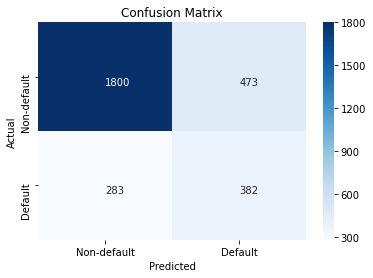

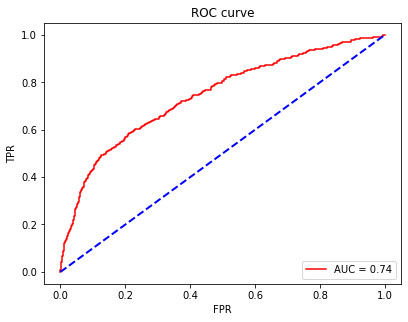

In [6]:
# Fitting Logistic Regression to the Training set
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression(random_state = 0, class_weight='balanced')
log_reg.fit(X_train, y_train)

# Predicting the Test set results
y_pred_lr = log_reg.predict(X_test)

conf_matrix_plot(log_reg)

# Classification report
print(classification_report(y_test,y_pred_lr))

print()

# Plotting ROC 
auc_lr = plot_roc_auc(log_reg)


In [7]:
#Creating a dataframe for comparison of various models.
auc_n=auc_lr
acc = accuracy_score(y_test, y_pred_lr)
prec = precision_score(y_test, y_pred_lr)
rec = recall_score(y_test, y_pred_lr)
f1 = f1_score(y_test, y_pred_lr)

results = pd.DataFrame([['Logistic_Regression', acc,prec,rec, f1,auc_n]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score','AUC'])
results

,Model,Accuracy,Precision,Recall,F1 Score,AUC
0,Logistic_Regression,0.742682,0.446784,0.574436,0.502632,0.742572


# Decision Tree

Accuracy is  0.7144315861130021
              precision    recall  f1-score   support

         0.0       0.82      0.81      0.81      2273
         1.0       0.37      0.39      0.38       665

    accuracy                           0.71      2938
   macro avg       0.60      0.60      0.60      2938
weighted avg       0.72      0.71      0.72      2938




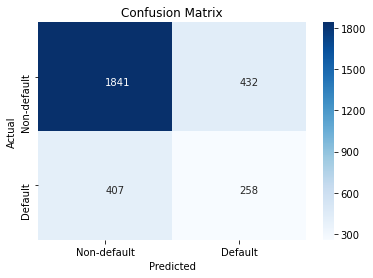

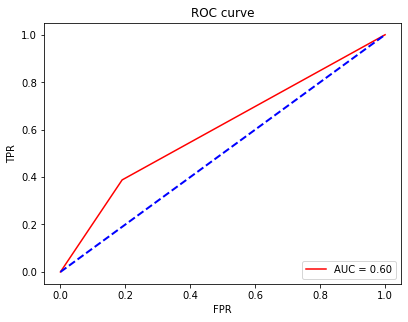

In [8]:
# Fitting Decision Tree Classification to the Training set
from sklearn.tree import DecisionTreeClassifier
dt_model = DecisionTreeClassifier(class_weight='balanced')
dt_model.fit(X_train, y_train)

# Predicting the Test set results
y_pred_dt = dt_model.predict(X_test)

#Confusion Matrix
conf_matrix_plot(dt_model)

# Classification report
print('Accuracy is ',dt_model.score(X_test, y_test))
print(classification_report(y_test,y_pred_dt))

print()
# Plotting ROC 
auc_dt = plot_roc_auc(dt_model)

In [9]:
auc_n= auc_dt
acc = accuracy_score(y_test, y_pred_dt)
prec = precision_score(y_test, y_pred_dt)
rec = recall_score(y_test, y_pred_dt)
f1 = f1_score(y_test, y_pred_dt)

model_res = pd.DataFrame([['Decision Tree', acc,prec,rec, f1,auc_n]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score','AUC'])
results = results.append(model_res)
results

,Model,Accuracy,Precision,Recall,F1 Score,AUC
0,Logistic_Regression,0.742682,0.446784,0.574436,0.502632,0.742572
0,Decision Tree,0.714432,0.373913,0.387970,0.380812,0.598956


# Random Forest

Accuracy is  0.7964601769911505
              precision    recall  f1-score   support

         0.0       0.82      0.95      0.88      2273
         1.0       0.61      0.28      0.38       665

    accuracy                           0.80      2938
   macro avg       0.71      0.61      0.63      2938
weighted avg       0.77      0.80      0.77      2938




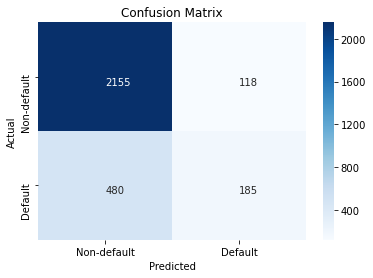

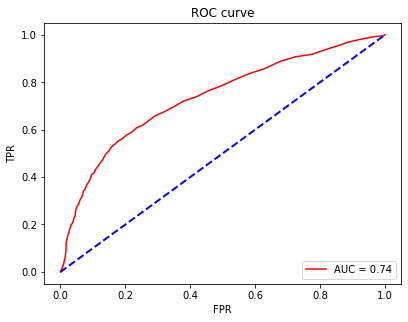

In [10]:
# Fitting Random Forest Classification to the Training set
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(class_weight='balanced')
rf_model.fit(X_train, y_train)

# Predicting the Test set results
y_pred_rf = rf_model.predict(X_test)

#Confusion Matrix
conf_matrix_plot(rf_model)

print('Accuracy is ',rf_model.score(X_test, y_test))
print(classification_report(y_test, y_pred_rf))
print()
# Plotting ROC 
auc_rf = plot_roc_auc(rf_model)

In [11]:
auc_n=auc_rf
acc = accuracy_score(y_test, y_pred_rf)
prec = precision_score(y_test, y_pred_rf)
rec = recall_score(y_test, y_pred_rf)
f1 = f1_score(y_test, y_pred_rf)

model_res = pd.DataFrame([['Random Forest', acc,prec,rec, f1,auc_n]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score','AUC'])
results = results.append(model_res)
results

,Model,Accuracy,Precision,Recall,F1 Score,AUC
0,Logistic_Regression,0.742682,0.446784,0.574436,0.502632,0.742572
0,Decision Tree,0.714432,0.373913,0.387970,0.380812,0.598956
0,Random Forest,0.796460,0.610561,0.278195,0.382231,0.736361


# Support Vector Classifier(kernel - 'rbf')

0.7593601089176311
              precision    recall  f1-score   support

         0.0       0.87      0.81      0.84      2273
         1.0       0.47      0.58      0.52       665

    accuracy                           0.76      2938
   macro avg       0.67      0.70      0.68      2938
weighted avg       0.78      0.76      0.77      2938




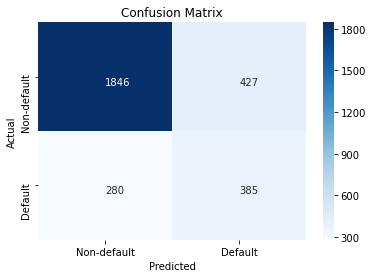

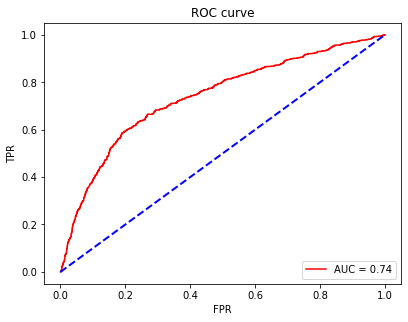

In [12]:
# Fitting Kernel(rbf) SVM to the Training set
from sklearn.svm import SVC
svc_modelr = SVC(kernel = 'rbf', random_state = 0,probability=True, class_weight='balanced')
svc_modelr.fit(X_train, y_train)

# Predicting the Test set results
y_pred_svcr = svc_modelr.predict(X_test)

#Confusion Matrix
conf_matrix_plot(svc_modelr)

print(svc_modelr.score(X_test, y_test))
print(classification_report(y_test, y_pred_svcr))
print()
# Plotting ROC 
auc_svcr= plot_roc_auc(svc_modelr)

In [13]:
auc_n= auc_svcr
acc = accuracy_score(y_test, y_pred_svcr)
prec = precision_score(y_test, y_pred_svcr)
rec = recall_score(y_test, y_pred_svcr)
f1 = f1_score(y_test, y_pred_svcr)

model_res = pd.DataFrame([['Support Vector Classifier(RBF)', acc,prec,rec, f1,auc_n]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score','AUC'])
results = results.append(model_res)
results

,Model,Accuracy,Precision,Recall,F1 Score,AUC
0,Logistic_Regression,0.742682,0.446784,0.574436,0.502632,0.742572
0,Decision Tree,0.714432,0.373913,0.387970,0.380812,0.598956
0,Random Forest,0.796460,0.610561,0.278195,0.382231,0.736361
0,Support Vector Classifier(RBF),0.759360,0.474138,0.578947,0.521327,0.737858


# Support Vector Classifier(kernel - 'linear')

0.7634445200816882
              precision    recall  f1-score   support

         0.0       0.85      0.84      0.85      2273
         1.0       0.48      0.49      0.48       665

    accuracy                           0.76      2938
   macro avg       0.66      0.67      0.66      2938
weighted avg       0.76      0.76      0.76      2938




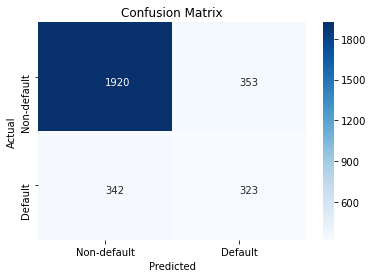

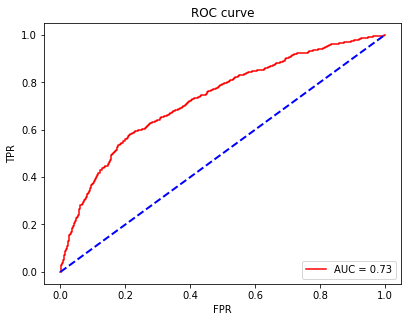

In [14]:
# Fitting Kernel(linear) SVM to the Training set
from sklearn.svm import SVC
svc_model = SVC(kernel = 'linear',probability=True, class_weight='balanced')
svc_model.fit(X_train, y_train)

# Predicting the Test set results
y_pred_svc = svc_model.predict(X_test)

#Confusion Matrix
conf_matrix_plot(svc_model)

print(svc_model.score(X_test, y_test))
print(classification_report(y_test, y_pred_svc))
print()
# Plotting ROC 
auc_svc= plot_roc_auc(svc_model)

In [15]:
auc_n= auc_svc
acc = accuracy_score(y_test, y_pred_svc)
prec = precision_score(y_test, y_pred_svc)
rec = recall_score(y_test, y_pred_svc)
f1 = f1_score(y_test, y_pred_svc)

model_res = pd.DataFrame([['Support Vector Classifier(Linear)', acc,prec,rec, f1,auc_n]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score','AUC'])
results = results.append(model_res)
results

,Model,Accuracy,Precision,Recall,F1 Score,AUC
0,Logistic_Regression,0.742682,0.446784,0.574436,0.502632,0.742572
0,Decision Tree,0.714432,0.373913,0.387970,0.380812,0.598956
0,Random Forest,0.796460,0.610561,0.278195,0.382231,0.736361
0,Support Vector Classifier(RBF),0.759360,0.474138,0.578947,0.521327,0.737858
0,Support Vector Classifier(Linear),0.763445,0.477811,0.485714,0.481730,0.728645


# Support Vector Classifier(kernel - 'poly')

0.7818243703199456
              precision    recall  f1-score   support

         0.0       0.84      0.88      0.86      2273
         1.0       0.52      0.44      0.48       665

    accuracy                           0.78      2938
   macro avg       0.68      0.66      0.67      2938
weighted avg       0.77      0.78      0.77      2938




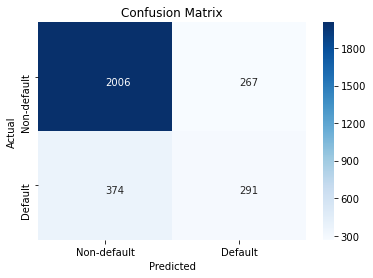

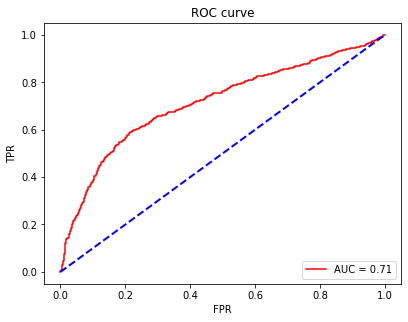

In [16]:
# Fitting Kernel(poly) SVM to the Training set
from sklearn.svm import SVC
svc_modelp = SVC(kernel = 'poly',probability=True, class_weight='balanced')
svc_modelp.fit(X_train, y_train)

# Predicting the Test set results
y_pred_svcp = svc_modelp.predict(X_test)

#Confusion Matrix
conf_matrix_plot(svc_modelp)

print(svc_modelp.score(X_test, y_test))
print(classification_report(y_test, y_pred_svcp))
print()
# Plotting ROC 
auc_svcp= plot_roc_auc(svc_modelp)

In [17]:
auc_n= auc_svcp
acc = accuracy_score(y_test, y_pred_svcp)
prec = precision_score(y_test, y_pred_svcp)
rec = recall_score(y_test, y_pred_svcp)
f1 = f1_score(y_test, y_pred_svcp)

model_res = pd.DataFrame([['Support Vector Classifier(Poly)', acc,prec,rec, f1,auc_n]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score','AUC'])
results = results.append(model_res)
results

,Model,Accuracy,Precision,Recall,F1 Score,AUC
0,Logistic_Regression,0.742682,0.446784,0.574436,0.502632,0.742572
0,Decision Tree,0.714432,0.373913,0.387970,0.380812,0.598956
0,Random Forest,0.796460,0.610561,0.278195,0.382231,0.736361
0,Support Vector Classifier(RBF),0.759360,0.474138,0.578947,0.521327,0.737858
0,Support Vector Classifier(Linear),0.763445,0.477811,0.485714,0.481730,0.728645
0,Support Vector Classifier(Poly),0.781824,0.521505,0.437594,0.475879,0.714085


# Support Vector Classifier(kernel - 'sigmoid')

0.6579305650102111
              precision    recall  f1-score   support

         0.0       0.85      0.68      0.75      2273
         1.0       0.35      0.59      0.44       665

    accuracy                           0.66      2938
   macro avg       0.60      0.64      0.60      2938
weighted avg       0.74      0.66      0.68      2938




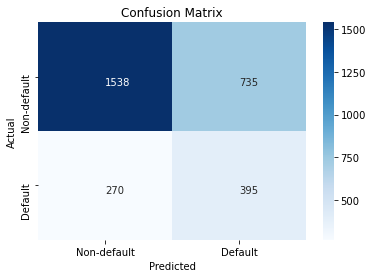

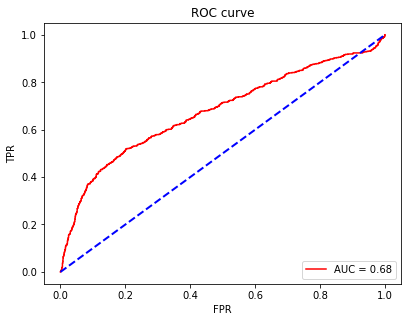

In [18]:
# Fitting Kernel(sigmoid) SVM to the Training set
from sklearn.svm import SVC
svc_models = SVC(kernel = 'sigmoid',probability=True, class_weight='balanced')
svc_models.fit(X_train, y_train)

# Predicting the Test set results
y_pred_svcs = svc_models.predict(X_test)

#Confusion Matrix
conf_matrix_plot(svc_models)

print(svc_models.score(X_test, y_test))
print(classification_report(y_test, y_pred_svcs))
print()
# Plotting ROC 
auc_svcs= plot_roc_auc(svc_models)

In [19]:
auc_n= auc_svcs
acc = accuracy_score(y_test, y_pred_svcs)
prec = precision_score(y_test, y_pred_svcs)
rec = recall_score(y_test, y_pred_svcs)
f1 = f1_score(y_test, y_pred_svcs)

model_res = pd.DataFrame([['Support Vector Classifier(Sigmoid)', acc,prec,rec, f1,auc_n]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score','AUC'])
results = results.append(model_res)
results

,Model,Accuracy,Precision,Recall,F1 Score,AUC
0,Logistic_Regression,0.742682,0.446784,0.574436,0.502632,0.742572
0,Decision Tree,0.714432,0.373913,0.387970,0.380812,0.598956
0,Random Forest,0.796460,0.610561,0.278195,0.382231,0.736361
0,Support Vector Classifier(RBF),0.759360,0.474138,0.578947,0.521327,0.737858
0,Support Vector Classifier(Linear),0.763445,0.477811,0.485714,0.481730,0.728645
0,Support Vector Classifier(Poly),0.781824,0.521505,0.437594,0.475879,0.714085
0,Support Vector Classifier(Sigmoid),0.657931,0.349558,0.593985,0.440111,0.676611


# K Nearest Neighbours

Confusion Matrix : 
0.7940776038121171
              precision    recall  f1-score   support

         0.0       0.82      0.93      0.88      2273
         1.0       0.58      0.32      0.41       665

    accuracy                           0.79      2938
   macro avg       0.70      0.63      0.64      2938
weighted avg       0.77      0.79      0.77      2938




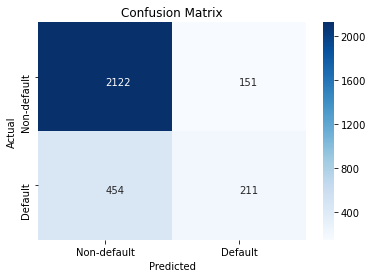

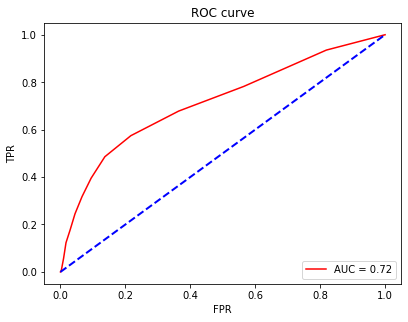

In [20]:
# Fitting KNN to the Training set
from sklearn.neighbors import KNeighborsClassifier
knn_model = KNeighborsClassifier(n_neighbors = 13)
knn_model.fit(X_train, y_train)

# Predicting the Test set results
y_pred_knn = knn_model.predict(X_test)

print('Confusion Matrix : ')
#Confusion Matrix
conf_matrix_plot(knn_model)

print(knn_model.score(X_test, y_test))
print(classification_report(y_test, y_pred_knn))

print()
# Plotting ROC curve. 
auc_knn=plot_roc_auc(knn_model)


In [21]:
auc_n=auc_knn
acc = accuracy_score(y_test, y_pred_knn)
prec = precision_score(y_test, y_pred_knn)
rec = recall_score(y_test, y_pred_knn)
f1 = f1_score(y_test, y_pred_knn)

model_res = pd.DataFrame([['KNN', acc,prec,rec, f1,auc_n]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score','AUC'])
results = results.append(model_res)
results

,Model,Accuracy,Precision,Recall,F1 Score,AUC
0,Logistic_Regression,0.742682,0.446784,0.574436,0.502632,0.742572
0,Decision Tree,0.714432,0.373913,0.387970,0.380812,0.598956
0,Random Forest,0.796460,0.610561,0.278195,0.382231,0.736361
0,Support Vector Classifier(RBF),0.759360,0.474138,0.578947,0.521327,0.737858
0,Support Vector Classifier(Linear),0.763445,0.477811,0.485714,0.481730,0.728645
0,Support Vector Classifier(Poly),0.781824,0.521505,0.437594,0.475879,0.714085
0,Support Vector Classifier(Sigmoid),0.657931,0.349558,0.593985,0.440111,0.676611
0,KNN,0.794078,0.582873,0.317293,0.410906,0.715279


## Logistic Regression-GridSearchCV

In [22]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import fbeta_score, make_scorer
f1_scorer = make_scorer(fbeta_score, beta=1)
# Hyperparameters to be checked.
parameters = {'C':[0.0001, 0.001, 0.01, 1, 0.1, 10, 100, 1000], 'penalty':['none','l2'] ,
              'solver':['lbfgs','sag','saga','newton-cg'],'class_weight':['balanced',None]}

# Logistic Regression estimator.
logreg_gs=LogisticRegression()

# GridSearchCV estimator.
logreg_gsmodel = GridSearchCV(logreg_gs, parameters, cv=10, n_jobs=-1,scoring=f1_scorer)

# Train the GridSearchCV estimator and search for the best parameters.
logreg_gsmodel.fit(X_train,y_train)
best_param=logreg_gsmodel.best_params_

best_param

{'C': 0.001, 'class_weight': 'balanced', 'penalty': 'l2', 'solver': 'lbfgs'}

Confusion Matrix : 


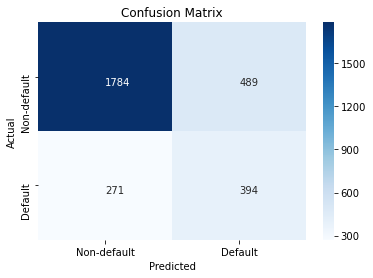

In [23]:
logreg_gridsearch=LogisticRegression(class_weight=best_param['class_weight'],C = best_param['C'], penalty= best_param['penalty'], solver=best_param['solver'])
logreg_gridsearch.fit(X_train, y_train)

# Predicting the Test set results
y_pred_lrgs = logreg_gridsearch.predict(X_test)

# Making the Confusion Matrix
print('Confusion Matrix : ')
#Confusion Matrix
conf_matrix_plot(logreg_gridsearch)

0.7413206262763785
              precision    recall  f1-score   support

         0.0       0.87      0.78      0.82      2273
         1.0       0.45      0.59      0.51       665

    accuracy                           0.74      2938
   macro avg       0.66      0.69      0.67      2938
weighted avg       0.77      0.74      0.75      2938




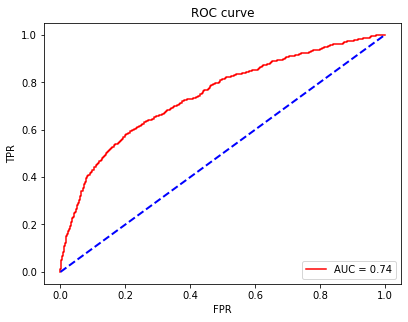

In [24]:
print(logreg_gridsearch.score(X_test, y_test))
print(classification_report(y_test, y_pred_lrgs))
print()
# Plotting ROC curve. 
auc_lrgs= plot_roc_auc(logreg_gridsearch)

In [25]:
auc_n=auc_lrgs
acc = accuracy_score(y_test, y_pred_lrgs)
prec = precision_score(y_test, y_pred_lrgs)
rec = recall_score(y_test, y_pred_lrgs)
f1 = f1_score(y_test, y_pred_lrgs)

model_res = pd.DataFrame([['Logistic_Regression_GridSearchCV', acc,prec,rec, f1,auc_n]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score','AUC'])
results = results.append(model_res)
results

,Model,Accuracy,Precision,Recall,F1 Score,AUC
0,Logistic_Regression,0.742682,0.446784,0.574436,0.502632,0.742572
0,Decision Tree,0.714432,0.373913,0.387970,0.380812,0.598956
0,Random Forest,0.796460,0.610561,0.278195,0.382231,0.736361
0,Support Vector Classifier(RBF),0.759360,0.474138,0.578947,0.521327,0.737858
0,Support Vector Classifier(Linear),0.763445,0.477811,0.485714,0.481730,0.728645
0,Support Vector Classifier(Poly),0.781824,0.521505,0.437594,0.475879,0.714085
0,Support Vector Classifier(Sigmoid),0.657931,0.349558,0.593985,0.440111,0.676611
0,KNN,0.794078,0.582873,0.317293,0.410906,0.715279
0,Logistic_Regression_GridSearchCV,0.741321,0.446206,0.592481,0.509044,0.743891


# SVC-GridSearchCV()

In [26]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import fbeta_score, make_scorer
f1_scorer = make_scorer(fbeta_score, beta=1)
parameters = {'C': [1, 10, 100, 1000], 'kernel': ['rbf'], 'gamma': [0.1,0.001,0.0001,1,'scale'],'probability':[True],'class_weight':['balanced',None],}
svm_model_rs=SVC()

grid_search_svm = GridSearchCV(estimator = svm_model_rs,param_grid=parameters,scoring = f1_scorer,cv = 5,n_jobs = -1, verbose=10)
grid_search_svm.fit(X_train, y_train)


Fitting 5 folds for each of 40 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:   52.6s
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:   53.7s
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:  2.5min
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:  3.0min
[Parallel(n_jobs=-1)]: Done  48 tasks      | elapsed:  3.7min
[Parallel(n_jobs=-1)]: Done  61 tasks      | elapsed:  4.7min
[Parallel(n_jobs=-1)]: Done  74 tasks      | elapsed:  5.7min
[Parallel(n_jobs=-1)]: Done  89 tasks      | elapsed:  6.5min
[Parallel(n_jobs=-1)]: Done 104 tasks      | elapsed:  8.1min
[Parallel(n_jobs=-1)]: Done 121 tasks      | elapsed:  9.6min
[Parallel(n_jobs=-1)]: Done 138 tasks      | elapsed: 11.1min
[Parallel(n_jobs=-1)]: Done 157 tasks      | elapsed: 13.2min
[Parallel(n_jobs=-1)]: Done 176 tasks      | elapsed: 15.8min
[Parallel(n_jobs=-1)]: Done 198 out of 200 | elapsed: 1

GridSearchCV(cv=5, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=-1,
             param_grid={'C': [1, 10, 100, 1000],
                         'class_weight': ['balanced', None],
                         'gamma': [0.1, 0.001, 0.0001, 1, 'scale'],
                         'kernel': ['rbf'], 'probability': [True]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=make_scorer(fbeta_score, beta=1), verbose=10)

In [27]:
gs_accuracy = grid_search_svm.best_score_
best_param=grid_search_svm.best_params_

best_param

{'C': 1,
 'class_weight': 'balanced',
 'gamma': 'scale',
 'kernel': 'rbf',
 'probability': True}

Confusion Matrix : 


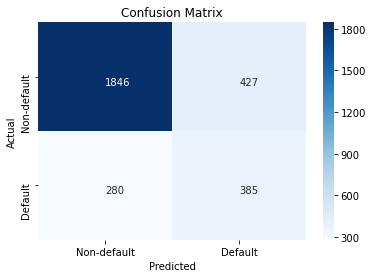

In [28]:
svm_gridsearch=SVC(C = best_param['C'], kernel= best_param['kernel'], gamma=best_param['gamma'], probability=best_param['probability'], class_weight=best_param['class_weight'])
svm_gridsearch.fit(X_train, y_train)

# Predicting the Test set results
y_pred_svmgs = svm_gridsearch.predict(X_test)

# Making the Confusion Matrix
print('Confusion Matrix : ')
#Confusion Matrix
conf_matrix_plot(svm_gridsearch)

0.7593601089176311
              precision    recall  f1-score   support

         0.0       0.87      0.81      0.84      2273
         1.0       0.47      0.58      0.52       665

    accuracy                           0.76      2938
   macro avg       0.67      0.70      0.68      2938
weighted avg       0.78      0.76      0.77      2938




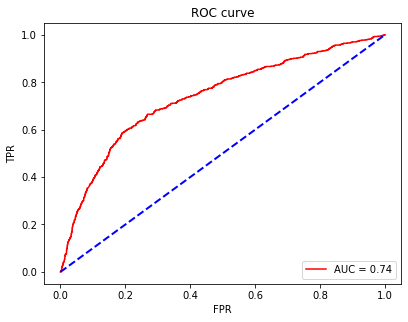

In [29]:

print(svm_gridsearch.score(X_test, y_test))
print(classification_report(y_test, y_pred_svmgs))
print()
# Plotting ROC curve. 
auc_svmrs = plot_roc_auc(svm_gridsearch)

In [30]:
auc_n=auc_svmrs
acc = accuracy_score(y_test, y_pred_svmgs)
prec = precision_score(y_test, y_pred_svmgs)
rec = recall_score(y_test, y_pred_svmgs)
f1 = f1_score(y_test, y_pred_svmgs)

model_res = pd.DataFrame([['SVC GridSearchCV', acc,prec,rec, f1,auc_n]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score','AUC'])
results = results.append(model_res)
results

,Model,Accuracy,Precision,Recall,F1 Score,AUC
0,Logistic_Regression,0.742682,0.446784,0.574436,0.502632,0.742572
0,Decision Tree,0.714432,0.373913,0.387970,0.380812,0.598956
0,Random Forest,0.796460,0.610561,0.278195,0.382231,0.736361
0,Support Vector Classifier(RBF),0.759360,0.474138,0.578947,0.521327,0.737858
0,Support Vector Classifier(Linear),0.763445,0.477811,0.485714,0.481730,0.728645
0,Support Vector Classifier(Poly),0.781824,0.521505,0.437594,0.475879,0.714085
0,Support Vector Classifier(Sigmoid),0.657931,0.349558,0.593985,0.440111,0.676611
0,KNN,0.794078,0.582873,0.317293,0.410906,0.715279
0,Logistic_Regression_GridSearchCV,0.741321,0.446206,0.592481,0.509044,0.743891
0,SVC GridSearchCV,0.759360,0.474138,0.578947,0.521327,0.737855


# XGBClassifier

Confusion Matrix : 

0.7423417290673928
              precision    recall  f1-score   support

         0.0       0.86      0.79      0.83      2273
         1.0       0.45      0.57      0.50       665

    accuracy                           0.74      2938
   macro avg       0.65      0.68      0.66      2938
weighted avg       0.77      0.74      0.75      2938



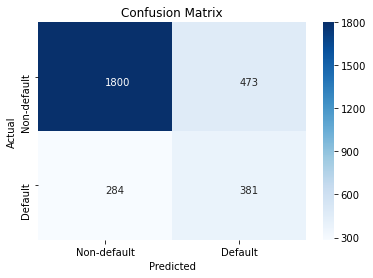

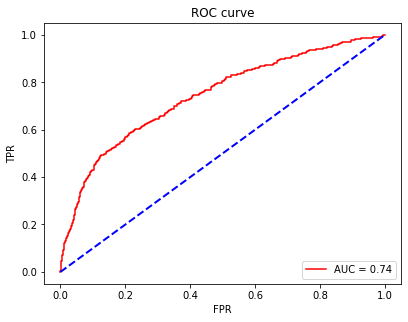

In [31]:
scale_pos_weight=(len(df1)-df1.def_payment.sum())/df1.def_payment.sum()
from xgboost import XGBClassifier
xgb = XGBClassifier(scale_pos_weight=scale_pos_weight,booster='gblinear')
xgb.fit(X_train, y_train)
y_pred_xgb = xgb.predict(X_test)

# Making the Confusion Matrix
print('Confusion Matrix : ')
#Confusion Matrix
conf_matrix_plot(xgb)

print()
print(xgb.score(X_test, y_test))
print(classification_report(y_test, y_pred_xgb))

# Plotting ROC curve. 
auc_xgb = plot_roc_auc(xgb)

In [32]:
auc_n=auc_xgb
acc = accuracy_score(y_test, y_pred_xgb)
prec = precision_score(y_test, y_pred_xgb)
rec = recall_score(y_test, y_pred_xgb)
f1 = f1_score(y_test, y_pred_xgb)

model_res = pd.DataFrame([['XGBClassifier', acc,prec,rec, f1,auc_n]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score','AUC'])
results = results.append(model_res)
results

,Model,Accuracy,Precision,Recall,F1 Score,AUC
0,Logistic_Regression,0.742682,0.446784,0.574436,0.502632,0.742572
0,Decision Tree,0.714432,0.373913,0.387970,0.380812,0.598956
0,Random Forest,0.796460,0.610561,0.278195,0.382231,0.736361
0,Support Vector Classifier(RBF),0.759360,0.474138,0.578947,0.521327,0.737858
0,Support Vector Classifier(Linear),0.763445,0.477811,0.485714,0.481730,0.728645
0,Support Vector Classifier(Poly),0.781824,0.521505,0.437594,0.475879,0.714085
0,Support Vector Classifier(Sigmoid),0.657931,0.349558,0.593985,0.440111,0.676611
0,KNN,0.794078,0.582873,0.317293,0.410906,0.715279
0,Logistic_Regression_GridSearchCV,0.741321,0.446206,0.592481,0.509044,0.743891
0,SVC GridSearchCV,0.759360,0.474138,0.578947,0.521327,0.737855


#### In above model performance table, Support vector classifier with Radial basis function kernel has the highest F1 score with 0.5213, which states that it has good Precision and Recall score and also AUC is 0.7379 which concludes the it as fair classification model. Hence, Support vector classifier with Radial basis function is best model among others. However, recall is 0.5789 which means that out of actual defaulters, only 57.89% are predicted correctly, and precision is 0.4741 which means that out of predicted defaulters, only 47.41% are actual defaulters. These rates should be higher in real life scenario, for credit card issuer to predict more precisely, which will in turn increase F1 score.